/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 65.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
The predicted species for the new crab is: Orange


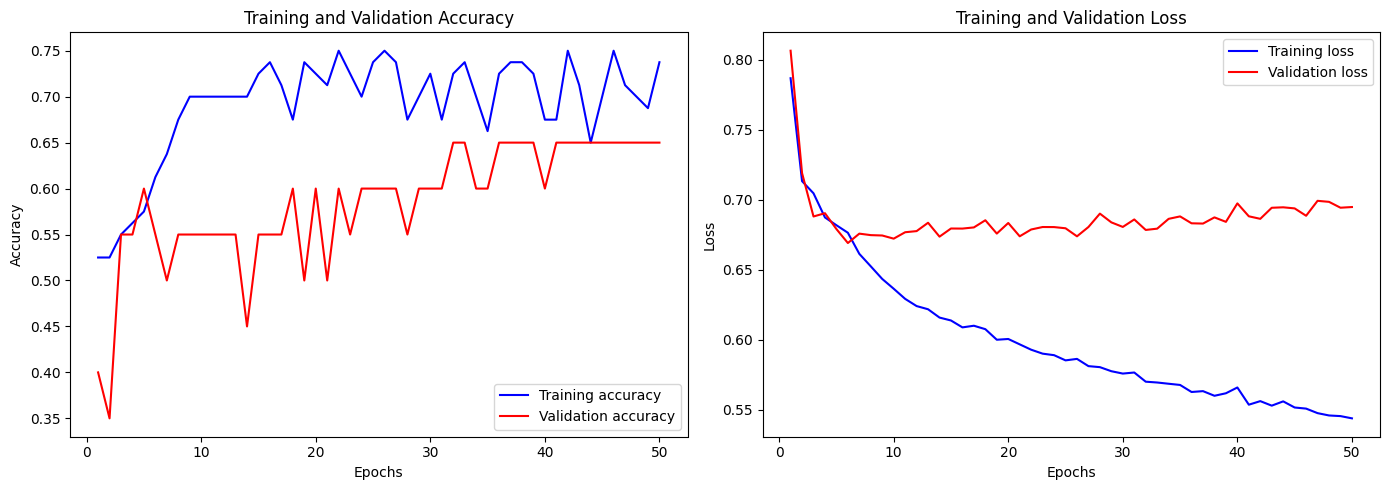

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Generate a larger synthetic dataset (100 crabs with features: shell width, claw size, weight)
np.random.seed(100)
blue_crabs = np.random.normal([5.5, 3.0, 0.4], 0.5, (50, 3))  # 50 Blue crabs
orange_crabs = np.random.normal([6.0, 3.5, 0.5], 0.5, (50, 3)) # 50 Orange crabs

# Combine the data and create labels (0 = Blue, 1 = Orange)
data = np.vstack((blue_crabs, orange_crabs))
labels = np.array([0] * 50 + [1] * 50)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Build and compile the neural network (PatternNet)
model = Sequential([
    Dense(5, input_dim=3, activation='relu'),  # 3 input features (shell width, claw size, weight)
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model and capture the history
history = model.fit(X_train, y_train, epochs=50, batch_size=4, verbose=0, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predict species for a new crab (e.g., shell width, claw size, weight)
new_crab = np.array([[5.9, 3.3, 0.55]])
prediction = (model.predict(new_crab) > 0.5).astype(int)
species = ["Blue", "Orange"]
print(f"The predicted species for the new crab is: {species[prediction[0][0]]}")

# Plotting training & validation accuracy and loss
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(14, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'b', label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'b', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
